In [296]:
from network_model import *
from pymarkowitz import *
import sys



import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [297]:
GAMBLES = generate_gambles(10, right=1.8)
GAMBLES.append({"outcomes":[1.1, 0.0], "probs":[1.0, 0.0]})

In [298]:
gamble_averages  = np.zeros((len(GAMBLES)))
gamble_variances = np.zeros((len(GAMBLES)))

# compute expected value and variance of each gamble
for i,g in enumerate(GAMBLES):
    gamble_averages[i]  = np.average(g["outcomes"], weights=g["probs"])
    gamble_variances[i] = np.average((g["outcomes"]-gamble_averages[i])**2, weights=g["probs"])

In [299]:
S = 1000
GAMBLE_PRIOR_SAMPLES = np.zeros((S, len(GAMBLES)))
for i,g in enumerate(GAMBLES):
    GAMBLE_PRIOR_SAMPLES[:,i] = np.random.choice(g["outcomes"], S, p=g["probs"])

In [300]:
GAMBLES_MU  = np.mean(GAMBLE_PRIOR_SAMPLES-1, axis=0)
GAMBLES_COV = np.cov(GAMBLE_PRIOR_SAMPLES-1, rowvar=False)

In [301]:
PortOpt = Optimizer(GAMBLES_MU, GAMBLES_COV)
PortOpt.add_objective("efficient_frontier", aversion=100)
PortOpt.add_constraint("weight", weight_bound=(0,1), leverage=1)

PortOpt.solve()
PortOpt.weight_sols

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pymarkowitz/Optimizer.py:368: UserWarning: "Detected no beta input. Will not be able to perform any beta-related optimization.
  warnings.warn(""""Detected no beta input. Will not be able to perform any beta-related optimization.""")


array([0.00785645, 0.0159122 , 0.01531408, 0.00572592, 0.00947092,
       0.02122418, 0.00574001, 0.00519176, 0.01389077, 0.02223179,
       0.8774419 ])

### Risk-aversion experiments

0.0
0.1786017327297083
0.7536885851033805
0.876798332906678


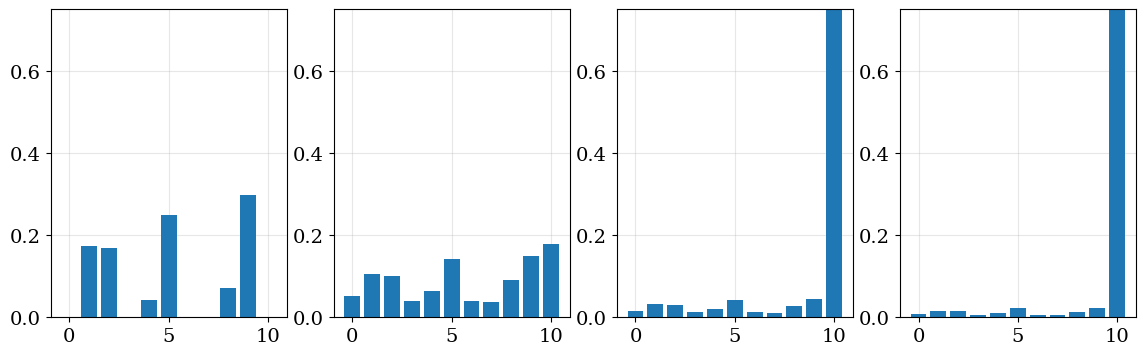

In [304]:
fig, axs = plt.subplots(1, 4, figsize=(14,4))


for i,aversion in enumerate([5, 15, 50, 100]):
    PortOpt = Optimizer(GAMBLES_MU, GAMBLES_COV)
    PortOpt.add_objective("efficient_frontier", aversion=aversion)
    PortOpt.add_constraint("weight", weight_bound=(0,1), leverage=1)

    PortOpt.solve()
    axs[i].bar(np.arange(len(GAMBLES)), PortOpt.weight_sols)
    print(PortOpt.weight_sols[-1])
    axs[i].set_ylim(0, 0.75)

plt.show()